In [168]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from tabulate import tabulate
import numpy as np
import seaborn as sns
import time

In [169]:
#imports 2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score


In [170]:
X_train = pd.read_csv("Bases/base_xtrain.csv")
X_test = pd.read_csv("Bases/base_xtest.csv")
y_train = pd.read_csv("Bases/base_ytrain.csv")
y_test = pd.read_csv("Bases/base_ytest.csv")

In [171]:
X_train.drop(columns=['Unnamed: 0'], inplace=True)
X_test.drop(columns=['Unnamed: 0'], inplace=True)
y_train.drop(columns=['Unnamed: 0'], inplace=True)
y_test.drop(columns=['Unnamed: 0'], inplace=True)

### INICIANDO MODELAGEM

In [172]:
#testando modelo antes do balanceamento
#Iremos comparar o precision e o recall antes e depois do balanceamento, para sabermos se deu certo
#importando modelo}
from sklearn.tree import DecisionTreeClassifier
#defininfo classificador
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
#Fazendo Fit com os dados
clf = clf.fit(X_train, y_train)

In [173]:
y_pred_treino = clf.predict(X_train)

In [174]:
#prev do resultado
y_pred = clf.predict(X_test)

In [175]:
from sklearn.metrics import accuracy_score
accuracy_bf = accuracy_score(y_test, y_pred)

print("Acurácia do modelo de Arvore de decisão:", accuracy_bf)

Acurácia do modelo de Arvore de decisão: 0.749392958316471


In [176]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred)

0.19908015768725362

In [177]:
from sklearn.metrics import recall_score
#verificando recall
recall_score(y_test,y_pred)

0.9395348837209302

In [178]:
from sklearn.metrics import confusion_matrix
#gerando matriz de confusão
confusion_matrix(y_test,y_pred)

array([[ 606,   39],
       [2438, 6801]], dtype=int64)

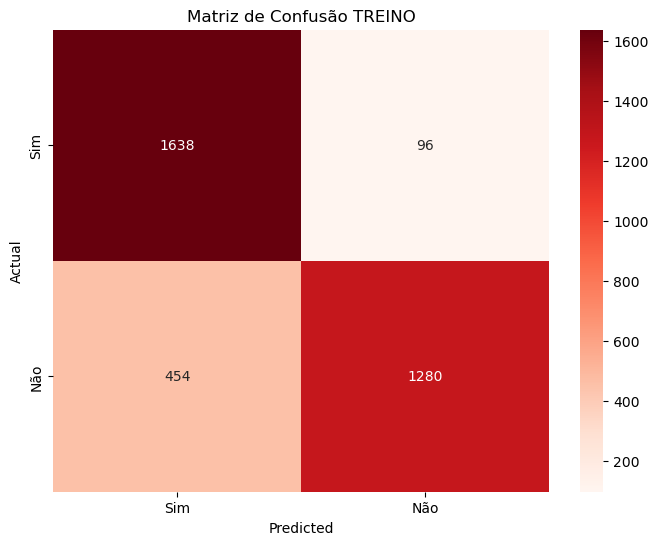

In [179]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_train, y_pred_treino)

# Plotando a matriz de confusão como um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g', xticklabels=['Sim', 'Não'], 
            yticklabels=['Sim', 'Não']) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão TREINO')
plt.show()

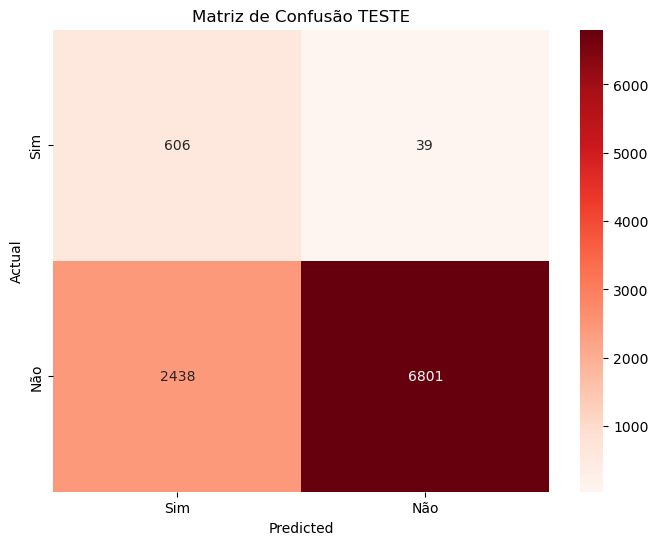

In [180]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão como um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g', xticklabels=['Sim', 'Não'], 
            yticklabels=['Sim', 'Não']) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão TESTE')
plt.show()

In [181]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.20      0.94      0.33       645
         2.0       0.99      0.74      0.85      9239

    accuracy                           0.75      9884
   macro avg       0.60      0.84      0.59      9884
weighted avg       0.94      0.75      0.81      9884



In [182]:
#MODELO DE TREINO
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_train, y_pred_treino))

              precision    recall  f1-score   support

         1.0       0.78      0.94      0.86      1734
         2.0       0.93      0.74      0.82      1734

    accuracy                           0.84      3468
   macro avg       0.86      0.84      0.84      3468
weighted avg       0.86      0.84      0.84      3468



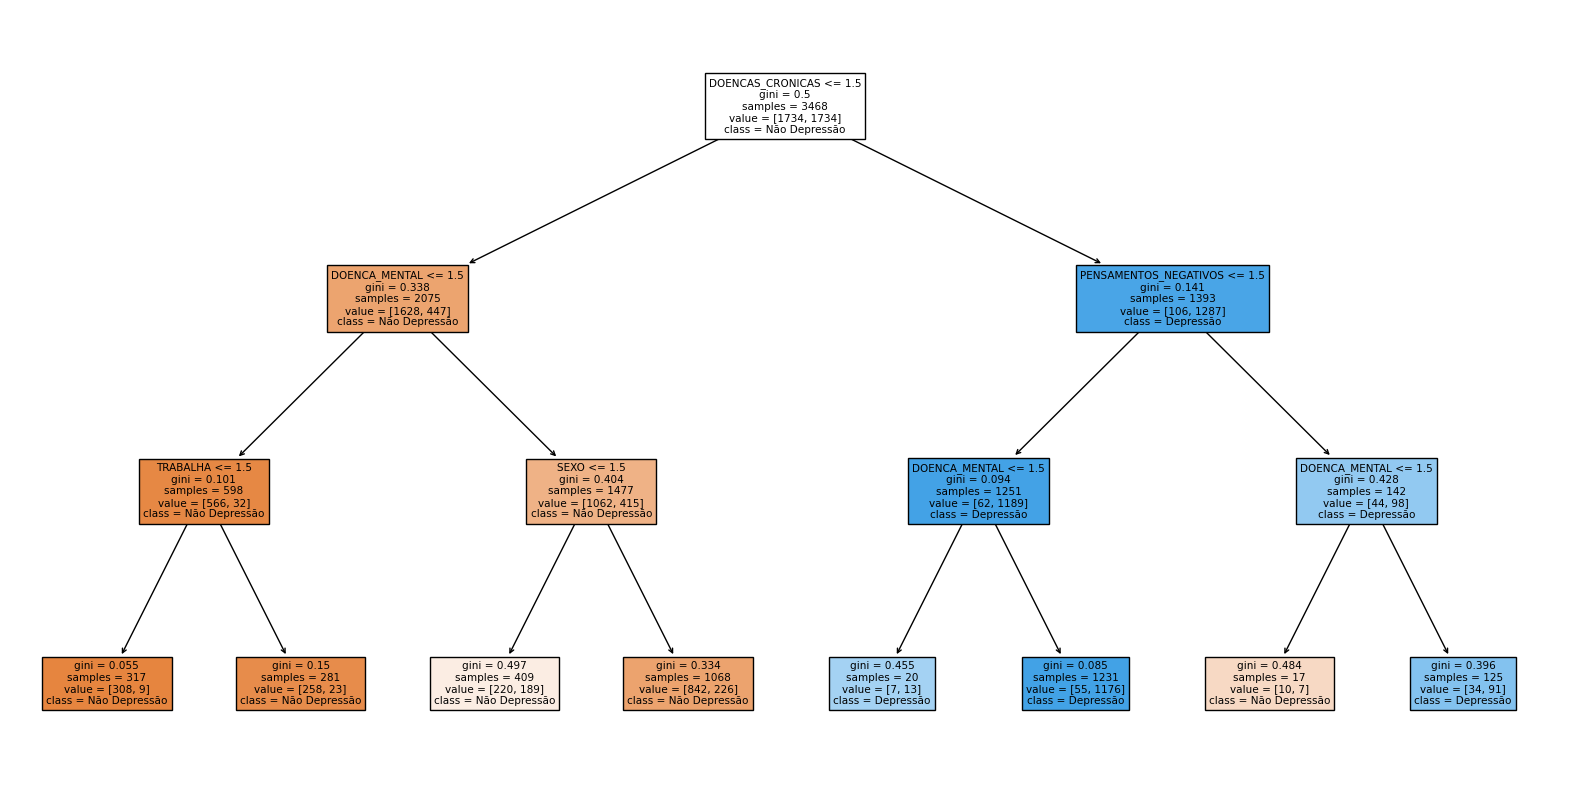

In [183]:
from sklearn.tree import plot_tree

# Convertendo os nomes das colunas para uma lista de strings
feature_names = list(X_test.columns)

# Plotando a árvore de decisão
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=feature_names, class_names=['Não Depressão', 'Depressão'], filled=True)
plt.show()

### RANDOM FOREST

In [184]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [185]:
X_train.shape

(3468, 20)

In [186]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_features=3)
rf = rf.fit(X_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [187]:
y_predRF = rf.predict(X_test)

In [188]:
y_pred_treino_RF = rf.predict(X_train)

In [189]:
from sklearn.metrics import accuracy_score
accuracy_bf = accuracy_score(y_test, y_predRF)

print("Acurácia do modelo de Random Forest:", accuracy_bf)

Acurácia do modelo de Random Forest: 0.792594091460947


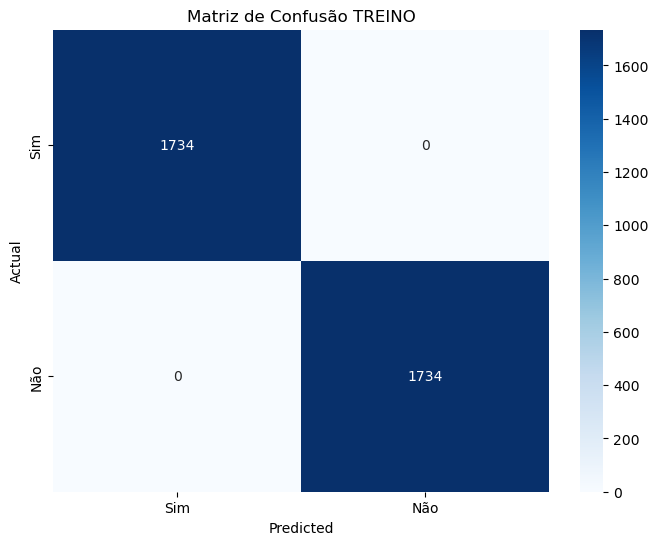

In [190]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_train, y_pred_treino_RF)

# Plotando a matriz de confusão como um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Sim', 'Não'], 
            yticklabels=['Sim', 'Não']) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão TREINO')
plt.show()

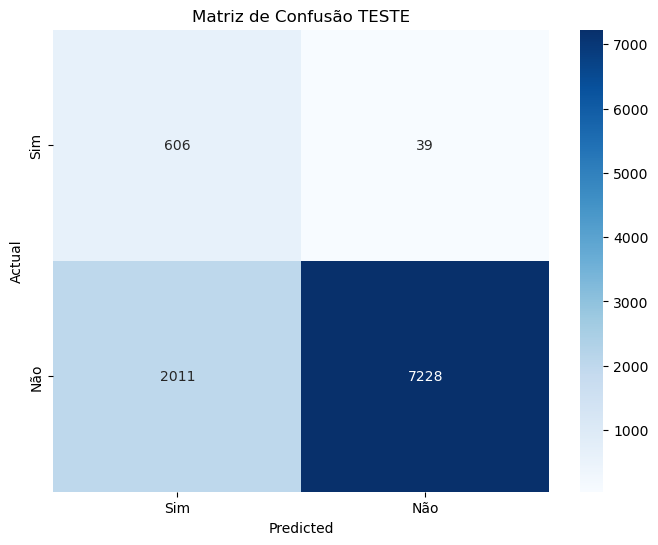

In [191]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_predRF)

# Plotando a matriz de confusão como um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Sim', 'Não'], 
            yticklabels=['Sim', 'Não']) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão TESTE')
plt.show()

In [192]:
print(classification_report(y_test, y_predRF))

              precision    recall  f1-score   support

         1.0       0.23      0.94      0.37       645
         2.0       0.99      0.78      0.88      9239

    accuracy                           0.79      9884
   macro avg       0.61      0.86      0.62      9884
weighted avg       0.94      0.79      0.84      9884



In [193]:
#MODELO DE TREINO
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_train, y_pred_treino_RF))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1734
         2.0       1.00      1.00      1.00      1734

    accuracy                           1.00      3468
   macro avg       1.00      1.00      1.00      3468
weighted avg       1.00      1.00      1.00      3468



### NAIVE

In [194]:
from sklearn.naive_bayes import GaussianNB
modelo = GaussianNB()

In [195]:
modelo.fit(X_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [196]:
previsoes = modelo.predict(X_test)

In [197]:
y_pred_treino_NB = modelo.predict(X_train)

In [198]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test,previsoes)

0.8409550789154189

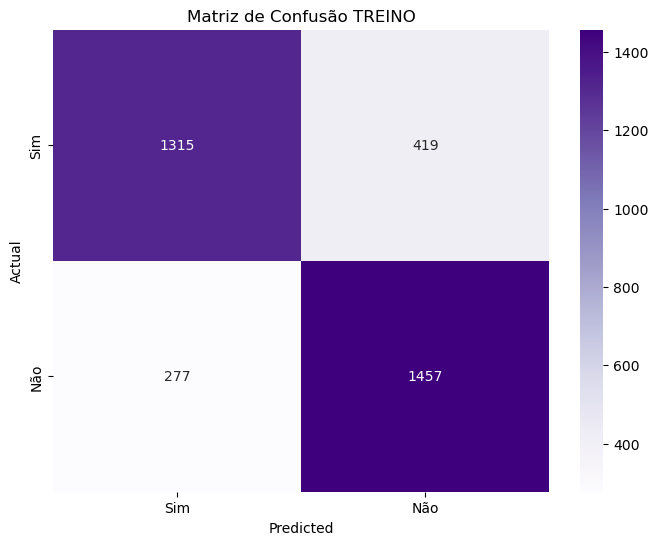

In [199]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_train, y_pred_treino_NB)

# Plotando a matriz de confusão como um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Purples', fmt='g', xticklabels=['Sim', 'Não'], 
            yticklabels=['Sim', 'Não']) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão TREINO')
plt.show()

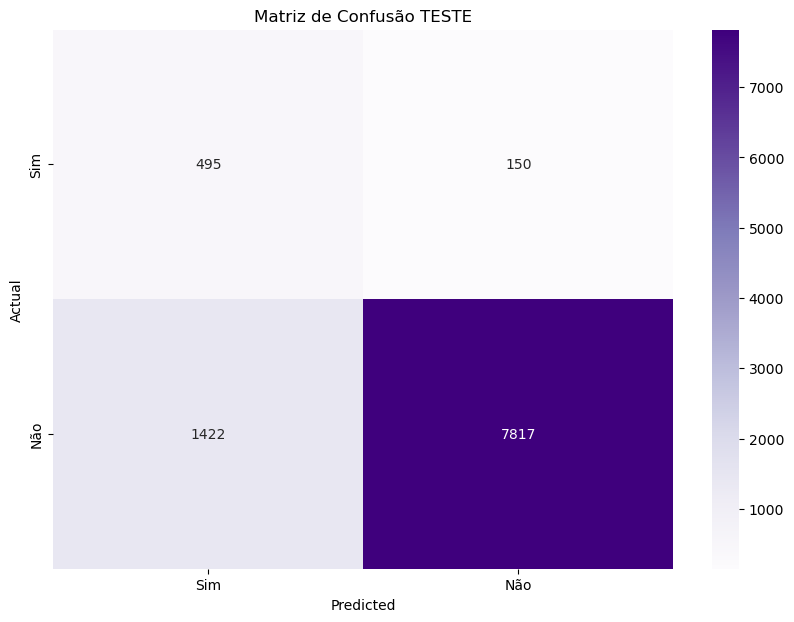

In [200]:
# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, previsoes)

# Plotando a matriz de confusão com a cor roxa
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Purples', fmt='g', xticklabels=['Sim', 'Não'], 
            yticklabels=['Sim', 'Não']) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão TESTE')
plt.show()

In [201]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

         1.0       0.26      0.77      0.39       645
         2.0       0.98      0.85      0.91      9239

    accuracy                           0.84      9884
   macro avg       0.62      0.81      0.65      9884
weighted avg       0.93      0.84      0.87      9884



In [202]:
#MODELO DE TREINO
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_train, y_pred_treino_NB))

              precision    recall  f1-score   support

         1.0       0.83      0.76      0.79      1734
         2.0       0.78      0.84      0.81      1734

    accuracy                           0.80      3468
   macro avg       0.80      0.80      0.80      3468
weighted avg       0.80      0.80      0.80      3468



## TESTANDO OUTROS MODELOS

#### REDE NEURAL

In [203]:
from sklearn.neural_network import MLPClassifier

rede_neural = MLPClassifier(solver='adam', hidden_layer_sizes=(20, 10), alpha=1e-4, max_iter=200, random_state=1)



In [204]:
# Treinamento do modelo
rede_neural.fit(X_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(20, 10), random_state=1)

In [205]:
y_predRNA = rede_neural.predict(X_test)

y_trainRNA = rede_neural.predict(X_train)

In [206]:
accuracy_score(y_test,y_predRNA)

0.8322541481181708

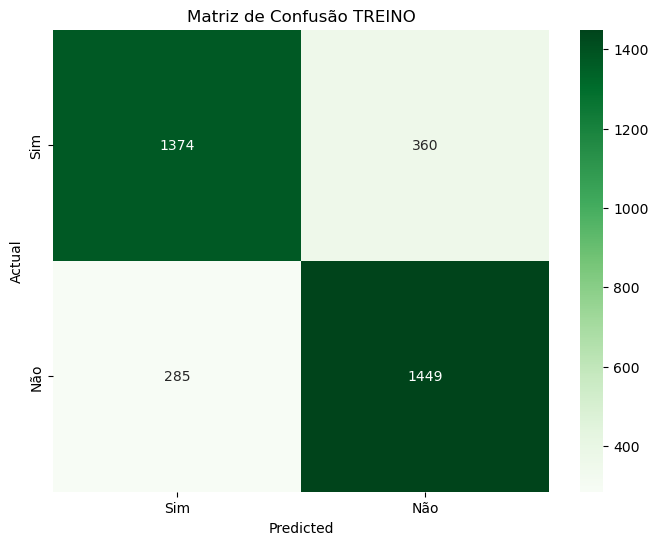

In [207]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_train, y_trainRNA)

# Plotando a matriz de confusão como um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', xticklabels=['Sim', 'Não'], 
            yticklabels=['Sim', 'Não']) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão TREINO')
plt.show()

In [208]:
#MODELO DE TREINO
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_train, y_trainRNA))

              precision    recall  f1-score   support

         1.0       0.83      0.79      0.81      1734
         2.0       0.80      0.84      0.82      1734

    accuracy                           0.81      3468
   macro avg       0.81      0.81      0.81      3468
weighted avg       0.81      0.81      0.81      3468



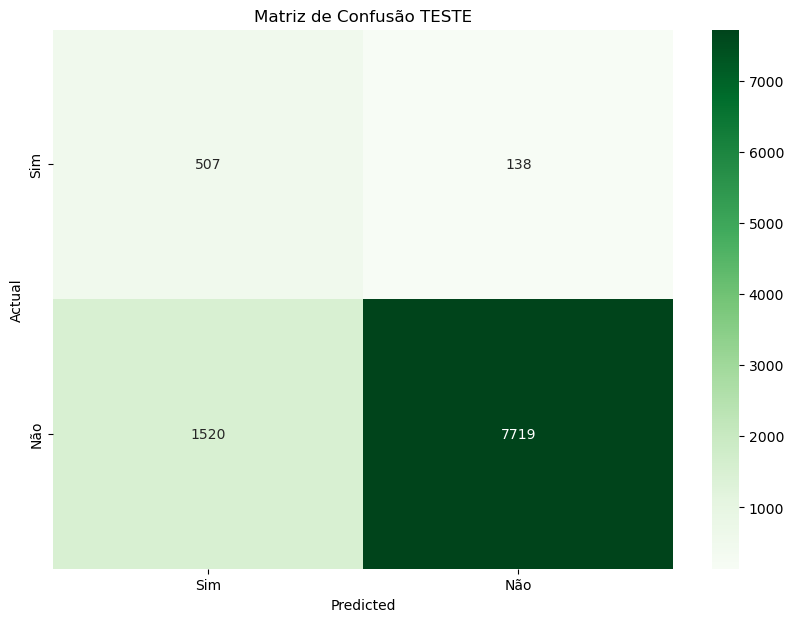

In [209]:
# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_predRNA)

# Plotando a matriz de confusão com a cor roxa
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', xticklabels=['Sim', 'Não'], 
            yticklabels=['Sim', 'Não']) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão TESTE')
plt.show()

In [210]:
#MODELO DE TESTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, y_predRNA))

              precision    recall  f1-score   support

         1.0       0.25      0.79      0.38       645
         2.0       0.98      0.84      0.90      9239

    accuracy                           0.83      9884
   macro avg       0.62      0.81      0.64      9884
weighted avg       0.93      0.83      0.87      9884



#### BAGGING

In [211]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [212]:
bagging = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=1)

In [213]:
bagging.fit(X_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=1)

In [214]:
y_predBAG = bagging.predict(X_test)

y_trainBAG = bagging.predict(X_train)

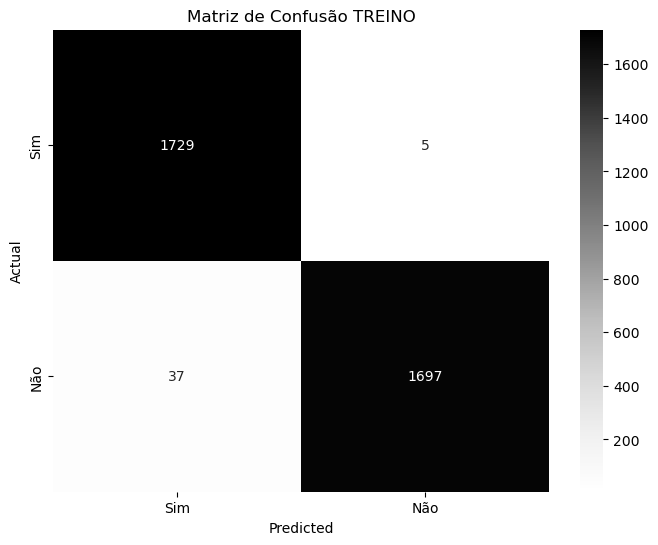

In [215]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_train, y_trainBAG)

# Plotando a matriz de confusão como um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greys', fmt='g', xticklabels=['Sim', 'Não'], 
            yticklabels=['Sim', 'Não']) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão TREINO')
plt.show()

In [216]:
#MODELO DE TREINO
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_train, y_trainBAG))

              precision    recall  f1-score   support

         1.0       0.98      1.00      0.99      1734
         2.0       1.00      0.98      0.99      1734

    accuracy                           0.99      3468
   macro avg       0.99      0.99      0.99      3468
weighted avg       0.99      0.99      0.99      3468



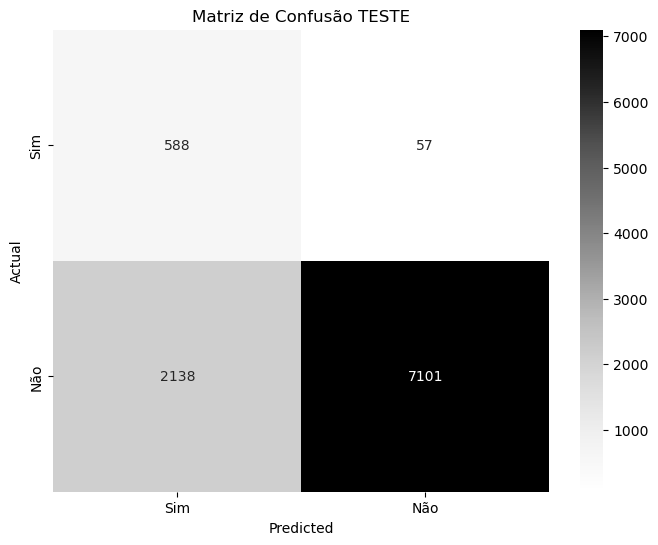

In [217]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_predBAG)

# Plotando a matriz de confusão como um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greys', fmt='g', xticklabels=['Sim', 'Não'], 
            yticklabels=['Sim', 'Não']) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão TESTE')
plt.show()

In [218]:
#MODELO DE TREINO
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, y_predBAG))

              precision    recall  f1-score   support

         1.0       0.22      0.91      0.35       645
         2.0       0.99      0.77      0.87      9239

    accuracy                           0.78      9884
   macro avg       0.60      0.84      0.61      9884
weighted avg       0.94      0.78      0.83      9884



## Cross Validation

In [219]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [220]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [221]:
scoresAD = cross_val_score(clf, X_test, y_test, cv=kf)
scoresRF = cross_val_score(rf, X_test, y_test, cv=kf)
scoresNY = cross_val_score(modelo, X_test, y_test, cv=kf)
scoresBG = cross_val_score(bagging, X_test, y_test, cv=kf)
scoresRNA = cross_val_score(rede_neural, X_test, y_test, cv=kf)
print("Acurácia média da Árvore:\n", scoresAD, scoresAD.mean(), "+-", scoresAD.std())
print("\nAcurácia média do RF:\n", scoresRF, scoresRF.mean(), "+-", scoresRF.std())
print("\nAcurácia média do Naive:\n", scoresNY, scoresNY.mean(), "+-", scoresNY.std())

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

Acurácia média da Árvore:
 [0.93629929 0.94742164 0.94539939 0.93731041 0.94534413 0.92611336
 0.94736842 0.94534413 0.93421053 0.93016194] 0.939497324824077 +- 0.007329349495525929

Acurácia média do RF:
 [0.94843276 0.95146613 0.95652174 0.94337715 0.95546559 0.93825911
 0.9534413  0.95242915 0.94331984 0.93927126] 0.9481984010348654 +- 0.0063540411868696295

Acurácia média do Naive:
 [0.89686552 0.9049545  0.90192113 0.89180991 0.89473684 0.89777328
 0.90384615 0.89676113 0.8937247  0.90080972] 0.8983202883540811 +- 0.004182145400859776


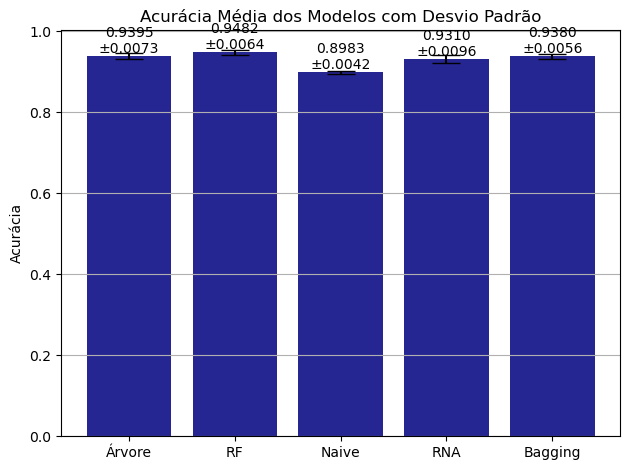

In [222]:
# Calculando as médias e os desvios padrões
models = ['Árvore', 'RF', 'Naive', 'RNA', 'Bagging']  # Nomes dos modelos
scores = [scoresAD, scoresRF, scoresNY, scoresRNA, scoresBG]
means = [score.mean() for score in scores]  # Média das acurácias
stds = [score.std() for score in scores]  # Desvio padrão das acurácias

# Criando o gráfico de barras
x_pos = np.arange(len(models))  # Posições no eixo x

fig, ax = plt.subplots()

# Barras de erro com cor azul escuro
bars = ax.bar(x_pos, means, yerr=stds, align='center', alpha=0.85, ecolor='black', capsize=10, color='navy')
ax.set_ylabel('Acurácia')  # Rótulo do eixo y
ax.set_xticks(x_pos)  # Posições no eixo x
ax.set_xticklabels(models)  # Nomes dos modelos como etiquetas no eixo x
ax.set_title('Acurácia Média dos Modelos com Desvio Padrão')  # Título do gráfico
ax.yaxis.grid(True)  # Adiciona uma grade no eixo y

# Adicionando legendas nas barras
for bar, mean, std in zip(bars, means, stds):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, f'{mean:.4f}\n±{std:.4f}', ha='center', va='bottom', color='black')

# Ajustando o layout para exibir o gráfico corretamente
plt.tight_layout()
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

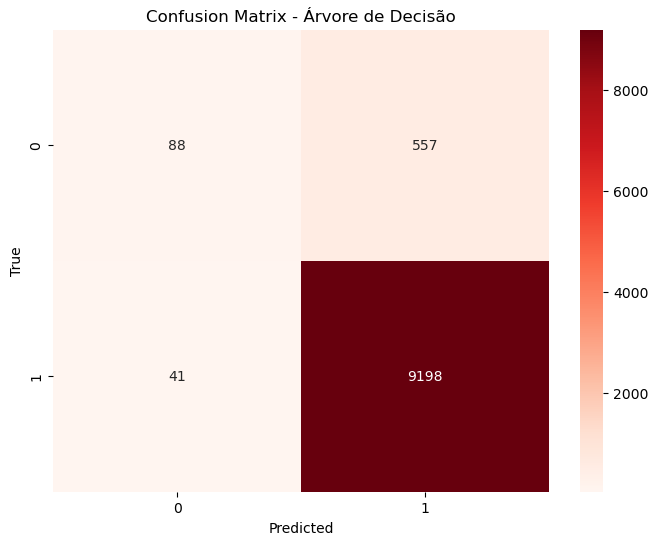

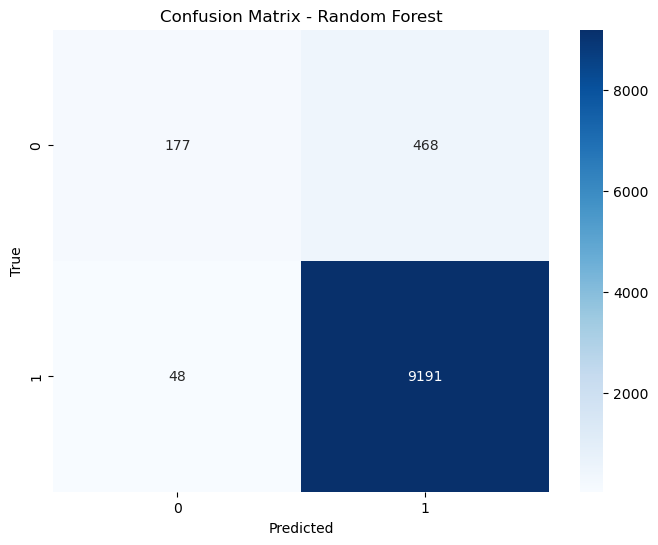

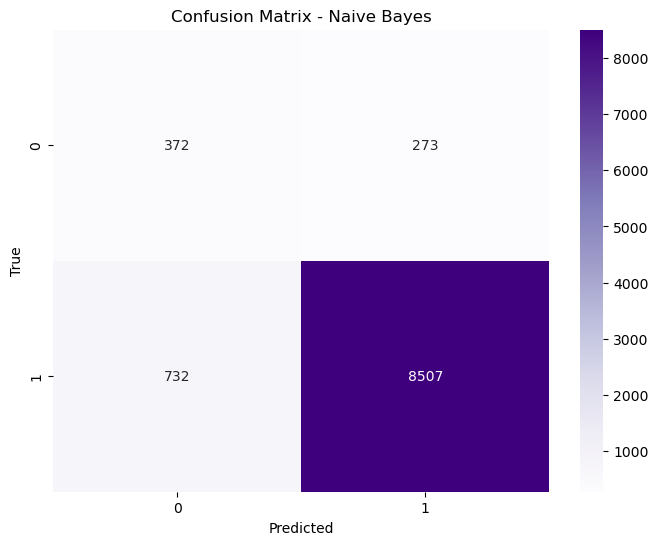

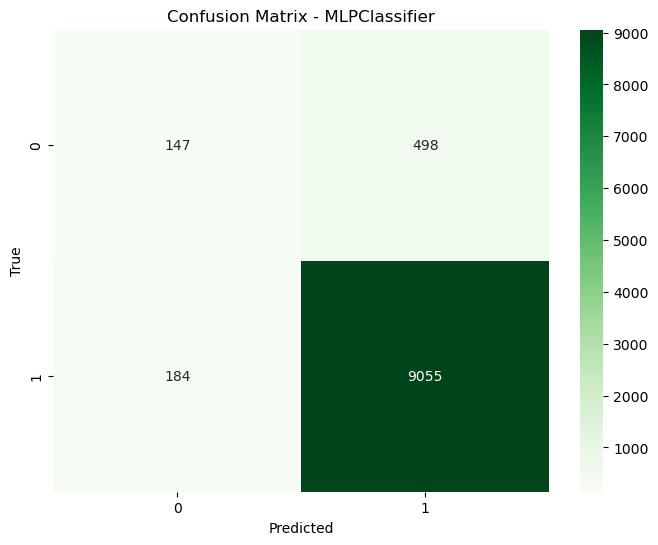

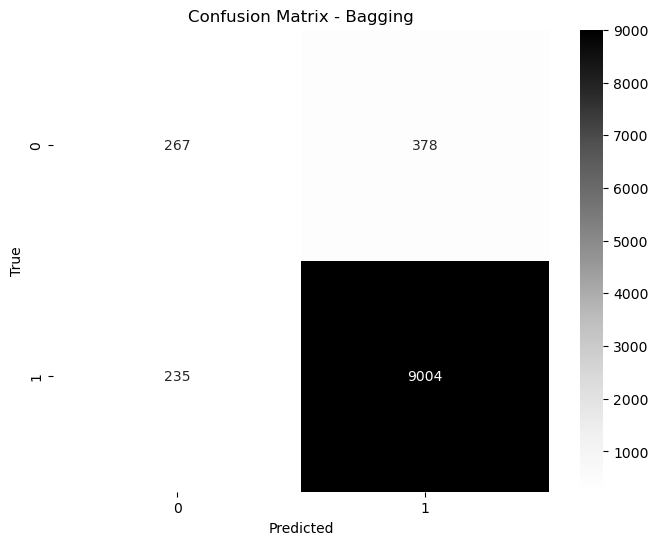

In [223]:
# Execute a validação cruzada e obtenha previsões
cros_pred_AD = cross_val_predict(clf, X_test, y_test, cv=kf)
cros_pred_RF = cross_val_predict(rf, X_test, y_test, cv=kf)
cros_pred_NY = cross_val_predict(modelo, X_test, y_test, cv=kf)
cros_pred_RNA = cross_val_predict(rede_neural, X_test, y_test, cv=kf)
cros_pred_BG = cross_val_predict(bagging, X_test, y_test, cv=kf)

# Calcule as matrizes de confusão
cm_AD = confusion_matrix(y_test, cros_pred_AD)
cm_RF = confusion_matrix(y_test, cros_pred_RF)
cm_NY = confusion_matrix(y_test, cros_pred_NY)
cm_RNA = confusion_matrix(y_test, cros_pred_RNA)
cm_BG = confusion_matrix(y_test, cros_pred_BG)

# Função para plotar matriz de confusão
def plot_confusion_matrix(cm, title,color):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=color)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Plote as matrizes de confusão
plot_confusion_matrix(cm_AD, 'Confusion Matrix - Árvore de Decisão','Reds')
plot_confusion_matrix(cm_RF, 'Confusion Matrix - Random Forest','Blues')
plot_confusion_matrix(cm_NY, 'Confusion Matrix - Naive Bayes','Purples')
plot_confusion_matrix(cm_RNA, 'Confusion Matrix - MLPClassifier','Greens')
plot_confusion_matrix(cm_BG, 'Confusion Matrix - Bagging','Greys')

### CURVA ROC

In [224]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(y_train, y_train)
    plt.plot(fpr, tpr)
    plt.xlabel('Taxa Falso Positivo')
    plt.ylabel('Taxa Verdadeiro Positive Rate')

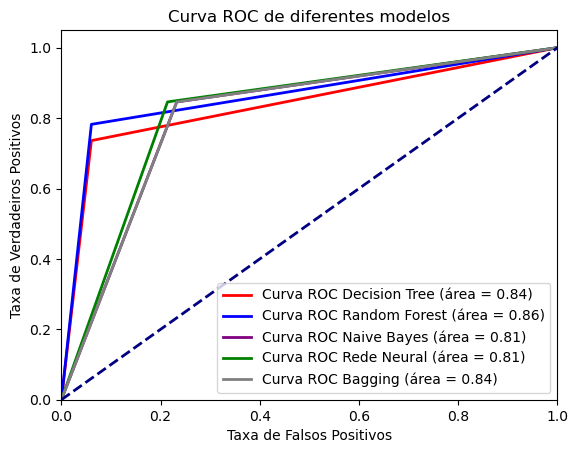

In [225]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Ajustar os valores para que sejam binários (0 e 1)
y_test_bin = y_test - 1

# Calcular as pontuações das previsões de probabilidade para cada modelo
# Para Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test_bin, y_pred, pos_label=1)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Para Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test_bin, y_predRF, pos_label=1)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Para Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test_bin, previsoes, pos_label=1)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Para Rede Neural
fpr_rna, tpr_rna, _ = roc_curve(y_test_bin, y_predRNA, pos_label=1)
roc_auc_rna = auc(fpr_rna, tpr_rna)

# Para Bagging
fpr_bag, tpr_bag, _ = roc_curve(y_test_bin, y_predBAG, pos_label=1)
roc_auc_bag = auc(fpr_bag, tpr_bag)

# Plotar as curvas ROC
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label='Curva ROC Decision Tree (área = %0.2f)' % roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Curva ROC Random Forest (área = %0.2f)' % roc_auc_rf)
plt.plot(fpr_nb, tpr_nb, color='purple', lw=2, label='Curva ROC Naive Bayes (área = %0.2f)' % roc_auc_nb)
plt.plot(fpr_rna, tpr_nb, color='green', lw=2, label='Curva ROC Rede Neural (área = %0.2f)' % roc_auc_rna)
plt.plot(fpr_nb, tpr_nb, color='grey', lw=2, label='Curva ROC Bagging (área = %0.2f)' % roc_auc_bag)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC de diferentes modelos')
plt.legend(loc="lower right")
plt.show()
